In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\one drive chandu\OneDrive\Documents\PG 32 Machine Learning\in+vehicle+coupon+recommendation\in-vehicle-coupon-recommendation.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [5]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [72]:
df['toCoupon_GEQ5min'].describe()

count    12684.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: toCoupon_GEQ5min, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
df.drop('car',axis=1,inplace=True)

In [73]:
df.drop('toCoupon_GEQ5min',inplace=True,axis=1)

In [74]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [75]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [76]:
df['Bar'].mode()

0    never
Name: Bar, dtype: object

In [77]:
for i in df[['Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20','Restaurant20To50']]:
    freq=df[i].value_counts(dropna=False)
    print(freq)

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [78]:
for i in df[['Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20','Restaurant20To50']]:
     df[i]=df[i].fillna(df[i].value_counts().idxmax())

In [79]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [80]:
# Frequency counts and pie of Y,gender,destination,coupon,expiration,income
# cross tabulation and stacked plots for Y and gender, Y and coupon,Y and income,Y and expration

In [81]:
# Hypothesis Testing
#Test Null No association between Y and Gender
#Test Null No association between Y and destination
#Test Null No association between Y and coupon

###  EDA

<Axes: ylabel='count'>

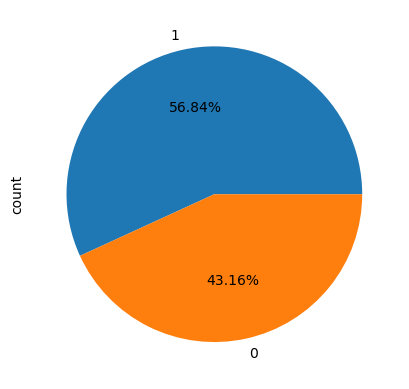

In [82]:
df['Y'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

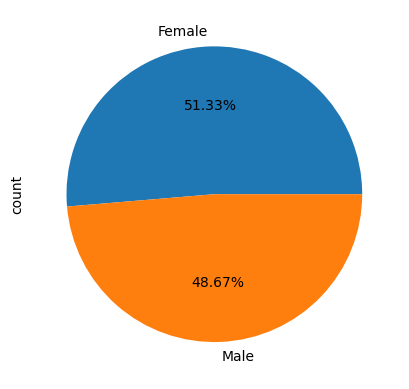

In [83]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

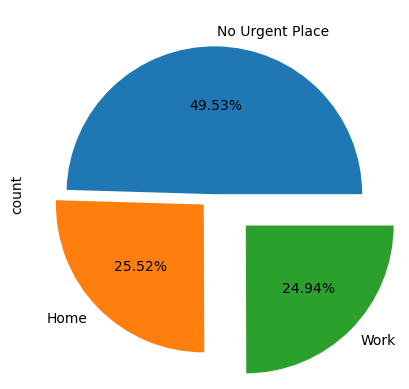

In [84]:
df['destination'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.1,0.3])

<Axes: ylabel='count'>

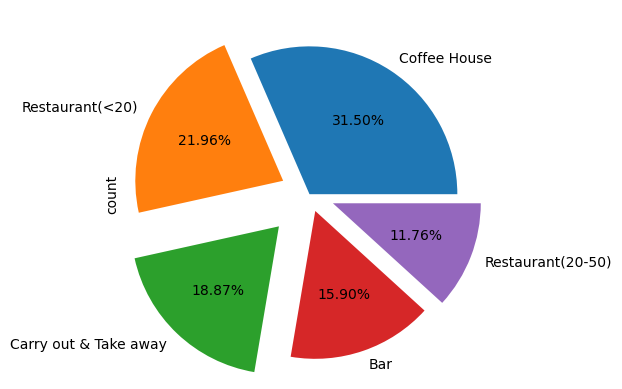

In [85]:
df['coupon'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.2,0.3,0.12,0.17])

<Axes: ylabel='count'>

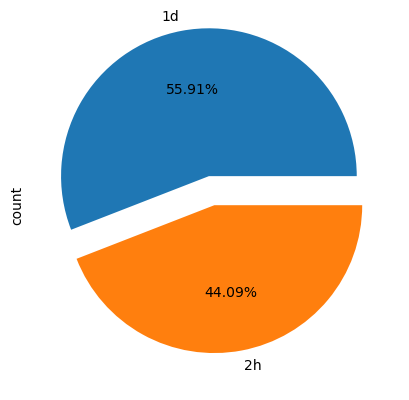

In [86]:
df['expiration'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0.2,0])

<Axes: ylabel='count'>

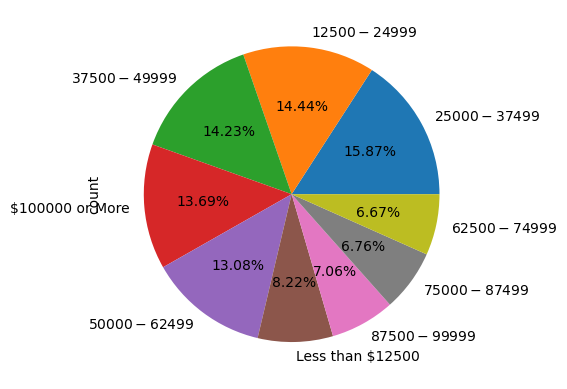

In [87]:
df['income'].value_counts().plot(kind='pie',autopct='%.2f%%')

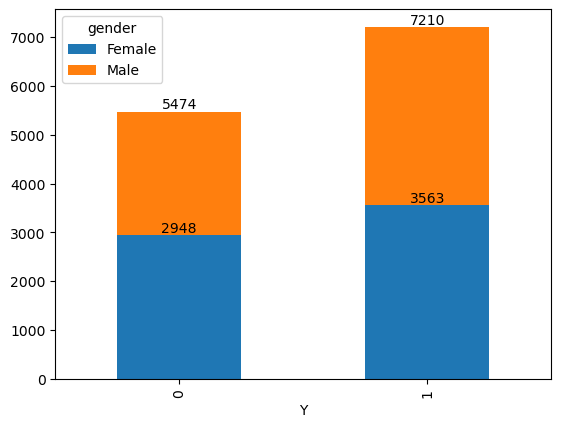

In [88]:
ax=pd.crosstab(df['Y'],df['gender']).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

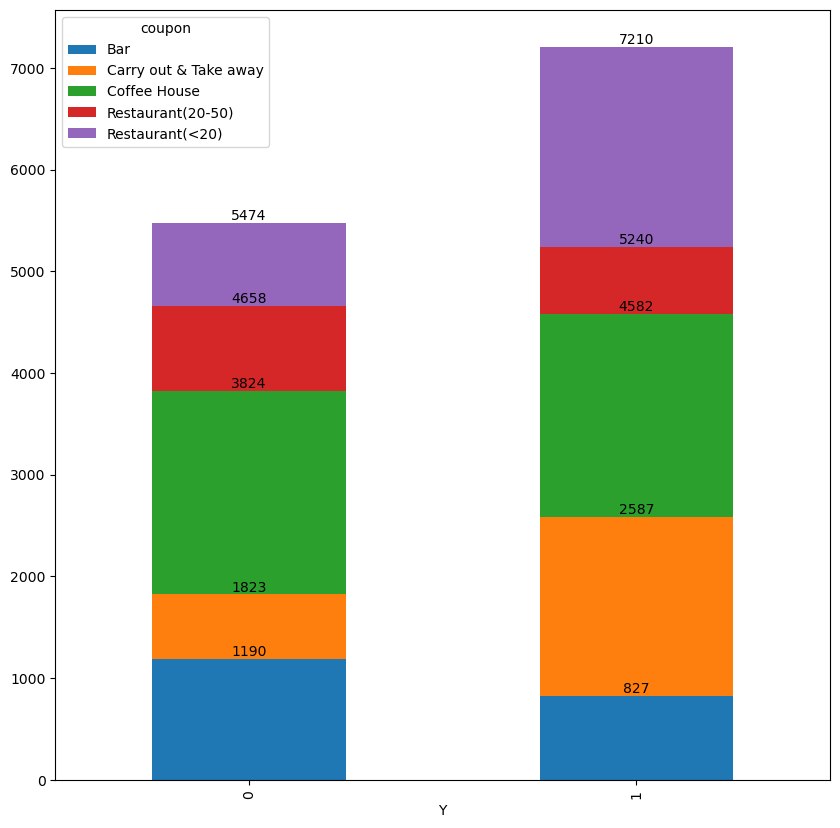

In [89]:
ax=pd.crosstab(df['Y'],df['coupon']).plot(kind='bar',stacked=True,figsize=(10,10))
for i in ax.containers:
    ax.bar_label(i)

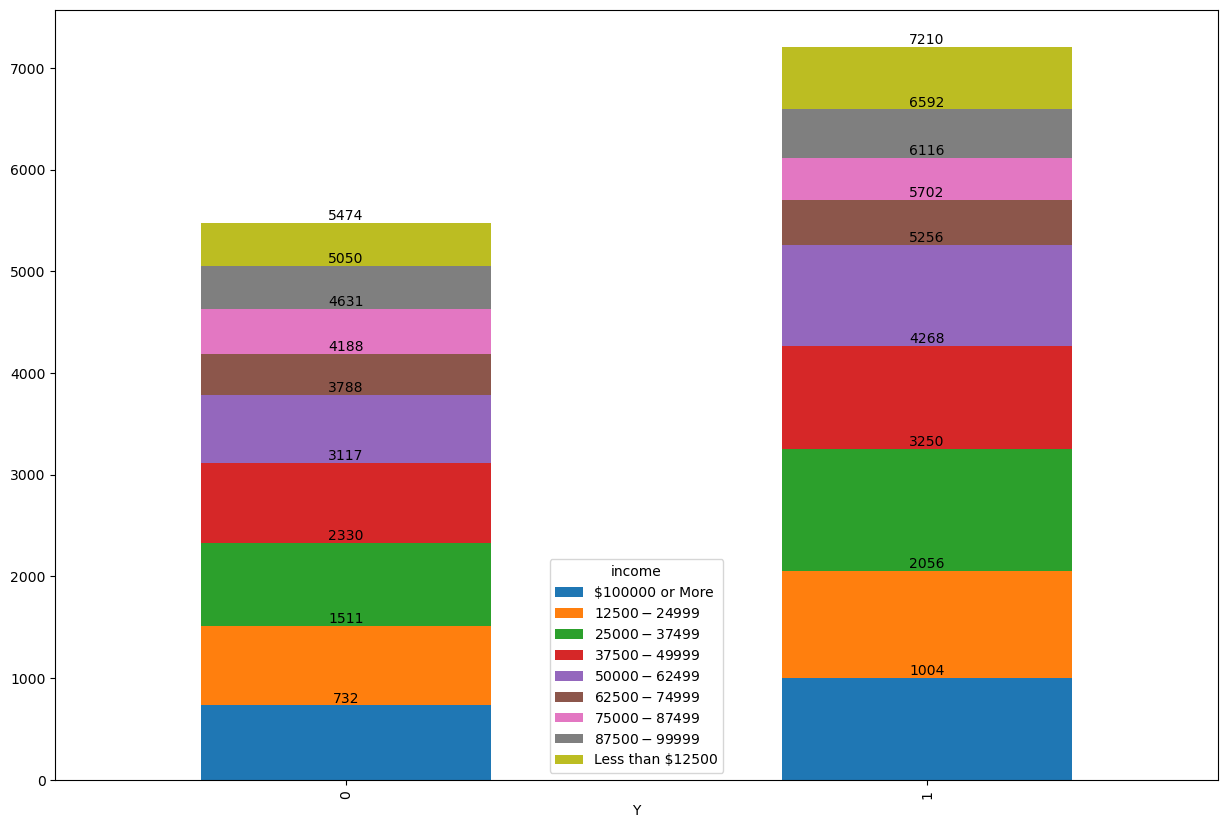

In [90]:
ax=pd.crosstab(df['Y'],df['income']).plot(kind='bar',stacked=True,figsize=(15,10))
for i in ax.containers:
    ax.bar_label(i)

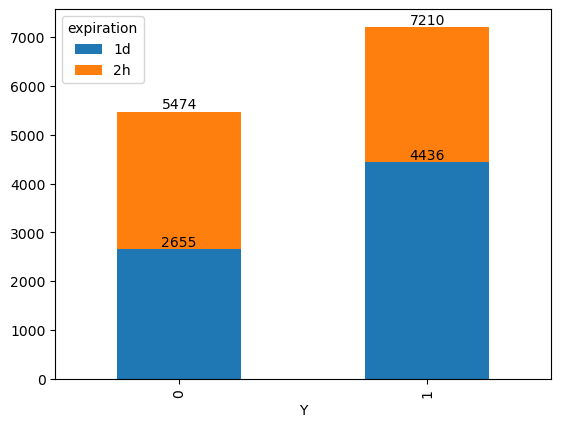

In [91]:
ax=pd.crosstab(df['Y'],df['expiration']).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [92]:
# Hypothesis Testing
#Test Null No association between Y and Gender
#Test Null No association between Y and destination
#Test Null No association between Y and coupon

In [93]:
from scipy.stats import chi2_contingency

In [94]:
pd.crosstab(df['gender'],df['Y'])

Y,0,1
gender,,
Female,2948,3563
Male,2526,3647


In [95]:
#Null-No asscociation between Y and gender
chi2_contingency(pd.crosstab(df['gender'],df['Y']))

Chi2ContingencyResult(statistic=24.344527038622925, pvalue=8.05552865589407e-07, dof=1, expected_freq=array([[2809.93487859, 3701.06512141],
       [2664.06512141, 3508.93487859]]))

In [96]:
pd.crosstab(df['Y'],df['destination'])

destination,Home,No Urgent Place,Work
Y,,,
0,1598,2301,1575
1,1639,3982,1589


In [97]:
#Null-No asscociation between Y and association
chi2_contingency(pd.crosstab(df['Y'],df['destination']))

Chi2ContingencyResult(statistic=216.79107304896826, pvalue=8.40265678045787e-48, dof=2, expected_freq=array([[1396.98344371, 2711.53752759, 1365.4790287 ],
       [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [98]:
pd.crosstab(df['Y'],df['coupon'])

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
Y,,,,,
0,1190,633,2001,834,816
1,827,1760,1995,658,1970


In [99]:
##Null-No asscociation between Y and coupon
chi2_contingency(pd.crosstab(df['Y'],df['coupon']))

Chi2ContingencyResult(statistic=873.6378240374827, pvalue=8.575341747082738e-188, dof=4, expected_freq=array([[ 870.47130243, 1032.7406181 , 1724.54304636,  643.89845475,
        1202.34657837],
       [1146.52869757, 1360.2593819 , 2271.45695364,  848.10154525,
        1583.65342163]]))

In [100]:
pd.crosstab(df['gender'],df['coupon'])

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
gender,,,,,
Female,1045,1240,2051,754,1421
Male,972,1153,1945,738,1365


In [101]:
chi2_contingency(pd.crosstab(df['gender'],df['coupon']))
# since p-value is greater than 0.05 ,fail to reject null

Chi2ContingencyResult(statistic=0.9077464226449882, pvalue=0.9234468480222715, dof=4, expected_freq=array([[1035.37425102, 1228.38402712, 2051.24219489,  765.87921791,
        1430.12030905],
       [ 981.62574898, 1164.61597288, 1944.75780511,  726.12078209,
        1355.87969095]]))

In [102]:
pd.crosstab(df['gender'],df['income'])

income,$100000 or More,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500
gender,,,,,,,,,
Female,757,993,1282,1015,722,347,462,379,554
Male,979,838,731,790,937,499,395,516,488


In [103]:
chi2_contingency(pd.crosstab(df['gender'],df['income']))
#since p_value is 1.6688064349766156e-59 less than 0.05 ,Reject Null

Chi2ContingencyResult(statistic=297.1442463179497, pvalue=1.6688064349766156e-59, dof=8, expected_freq=array([[ 891.13024283,  939.89601072, 1033.32095553,  926.54959003,
         851.60430464,  434.27199622,  439.91855881,  459.42486597,
         534.88347524],
       [ 844.86975717,  891.10398928,  979.67904447,  878.45040997,
         807.39569536,  411.72800378,  417.08144119,  435.57513403,
         507.11652476]]))

In [104]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0


In [105]:
#split Data into X and Y
y=df['Y']
x=df.drop('Y',axis=1)

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
x=x.astype(str).apply(LabelEncoder().fit_transform)

In [108]:
y=LabelEncoder().fit_transform(y)

In [109]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(x,y)

In [110]:
lr.score(x,y)

0.6295332702617471

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=8).fit(x,y)

In [112]:
dt.score(x,y)

0.7444812362030905

In [113]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(dt,x,y)

In [114]:
cv.mean()

0.6681616803174221

In [115]:
cv

array([0.67875443, 0.71817107, 0.65983445, 0.65313362, 0.63091483])

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,max_depth=8).fit(x,y)

In [117]:
rf.score(x,y)

0.7579627877641123

In [118]:
cv=cross_val_score(rf,x,y)

In [119]:
cv.mean()

0.6822778089325304

In [120]:
cv

array([0.67954277, 0.68821443, 0.6756011 , 0.67402444, 0.69400631])

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier(n_estimators=1000,max_depth=8).fit(x,y)

In [122]:
gd.score(x,y)

0.9981866918953012

In [123]:
cv=cross_val_score(gd,x,y)

In [124]:
cv.mean()

0.6584682347938212

In [125]:
lrpredict=lr.predict(x)
dtpredict=dt.predict(x)
rfpredict=rf.predict(x)
gbpredict=gd.predict(x)


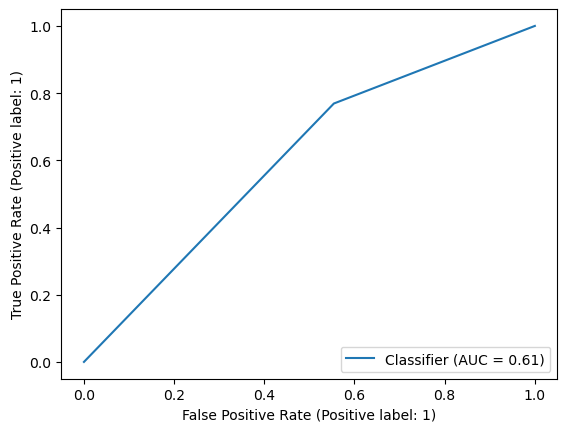

In [126]:
from sklearn.metrics import classification_report,RocCurveDisplay
RocCurveDisplay.from_predictions(y,lrpredict)

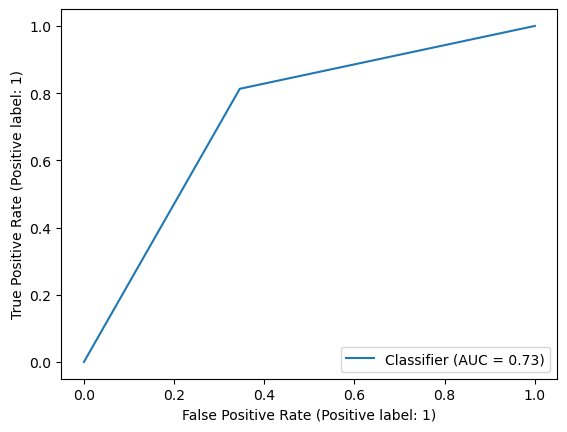

In [127]:
RocCurveDisplay.from_predictions(y,dtpredict)

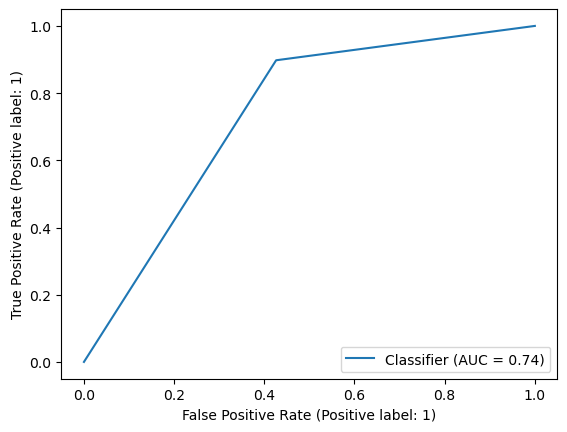

In [128]:
RocCurveDisplay.from_predictions(y,rfpredict)

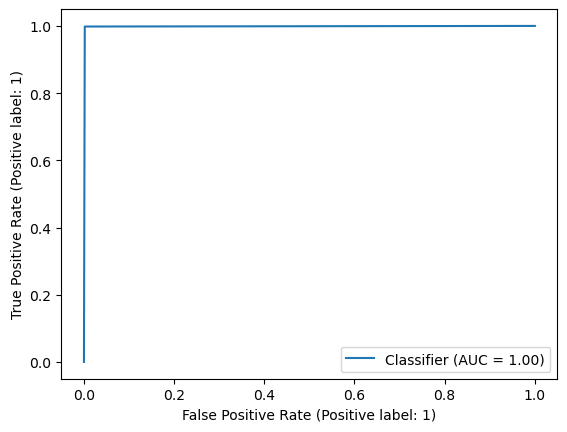

In [129]:
RocCurveDisplay.from_predictions(y,gbpredict)

In [130]:
import pickle

In [131]:
pickle.dump(gd,open('gbmodel.pkl','wb')) #wb means write

In [132]:
pkl_model=pickle.load(open('gbmodel.pkl','rb')) #rb means read

In [133]:
import os